In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns 

In [3]:
df=sns.load_dataset("iris")

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:
encoder=LabelEncoder()

In [8]:
df["species"]=encoder.fit_transform(df["species"])

In [9]:
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

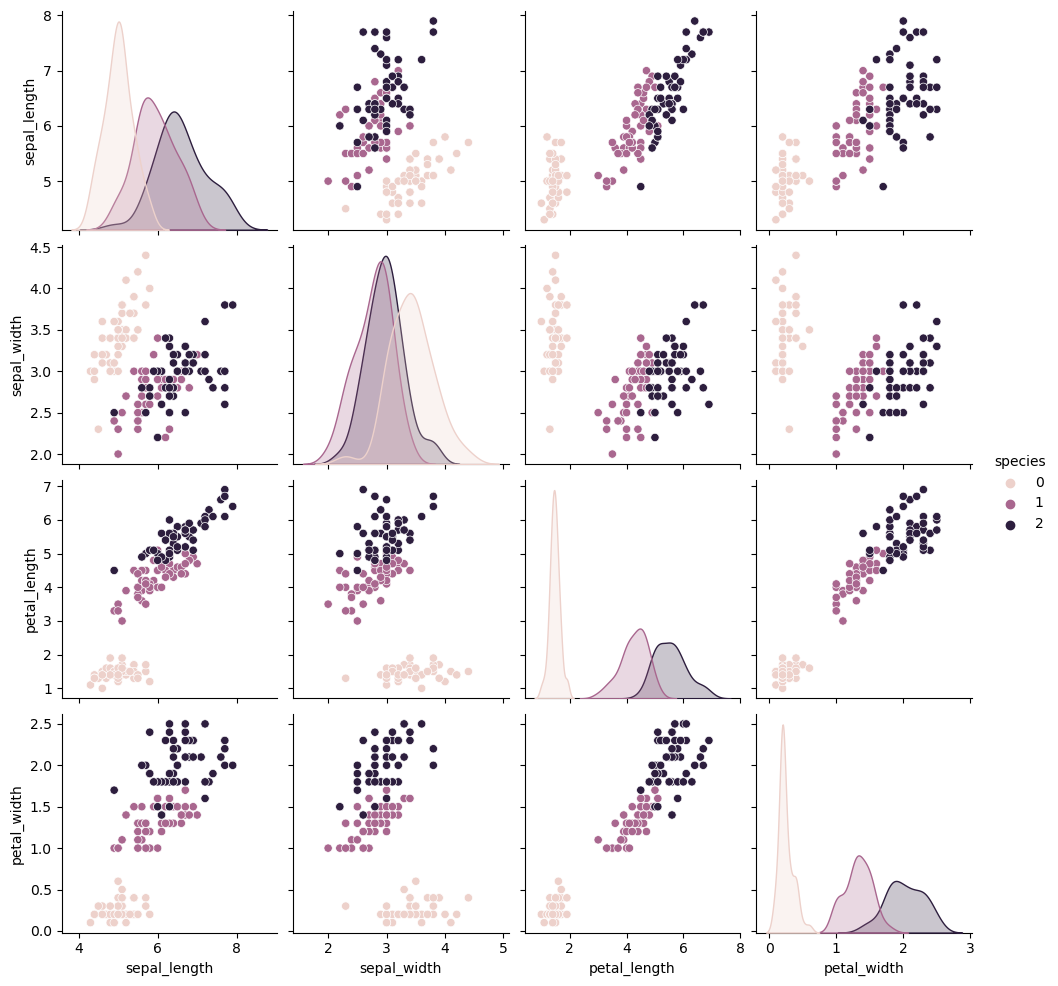

In [10]:
sns.pairplot(df,hue="species")

In [11]:
new_df = df[df['species']!= 0][["sepal_length", 'sepal_width', 'species']]

In [12]:
new_df

,sepal_length,sepal_width,species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [13]:
X = df.iloc[:,0:2]
y = df.iloc[:, -1]

In [14]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

In [15]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [16]:
estimators = [('1r', clf1), ('rf', clf2), ('knn', clf3)]

In [17]:
for estimator in estimators:
    x=cross_val_score(estimator[1],X,y,cv=10,scoring="accuracy")
    print(estimator[0],np.round(np.mean(x),2))

1r 0.81
rf 0.74
knn 0.76


# hard voting`

In [18]:
from sklearn.ensemble import VotingClassifier

In [19]:
vc=VotingClassifier(estimators=estimators)
x=cross_val_score(vc,X,y,cv=10,scoring="accuracy")
print(np.round(np.mean(x),2))

0.77


# Soft voting

In [20]:
vc1=VotingClassifier(estimators=estimators,voting="soft")
x1=cross_val_score(vc1,X,y,cv=10,scoring="accuracy")
print(np.round(np.mean(x1),2))

0.75


In [21]:
for i in range(1,4):
    for j in range(1,4) :
        for k in range (1,4) :
            vc = VotingClassifier(estimators=estimators, voting='soft', weights=[i, j,k])
            x = cross_val_score (vc, X, y, cv=10, scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k), np.round(np .mean(x) ,2))

for i=1,j=1,k=1 0.77
for i=1,j=1,k=2 0.75
for i=1,j=1,k=3 0.75
for i=1,j=2,k=1 0.75
for i=1,j=2,k=2 0.76
for i=1,j=2,k=3 0.75
for i=1,j=3,k=1 0.73
for i=1,j=3,k=2 0.75
for i=1,j=3,k=3 0.75
for i=2,j=1,k=1 0.78
for i=2,j=1,k=2 0.76
for i=2,j=1,k=3 0.76
for i=2,j=2,k=1 0.76
for i=2,j=2,k=2 0.77
for i=2,j=2,k=3 0.76
for i=2,j=3,k=1 0.73
for i=2,j=3,k=2 0.76
for i=2,j=3,k=3 0.76
for i=3,j=1,k=1 0.79
for i=3,j=1,k=2 0.77
for i=3,j=1,k=3 0.78
for i=3,j=2,k=1 0.77
for i=3,j=2,k=2 0.75
for i=3,j=2,k=3 0.75
for i=3,j=3,k=1 0.77
for i=3,j=3,k=2 0.77
for i=3,j=3,k=3 0.76
